# TP2 regression logistique

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

[[0.96414698 0.03585302]
 [0.96440321 0.03559679]]


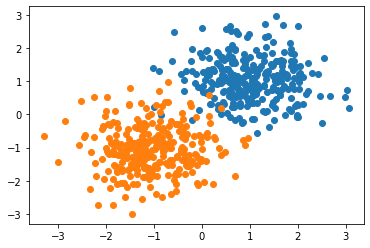

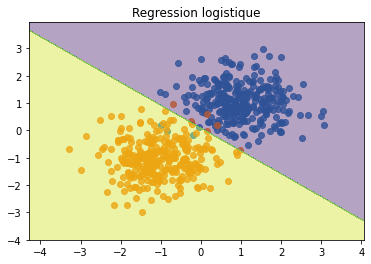

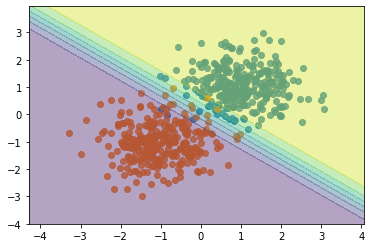

In [3]:
sigma = 0.7
mu1 = 1, 1
s1 = np.random.normal(mu1, sigma, (300, 2))

mu2 = -1, -1
s2 = np.random.normal(mu2, sigma, (300, 2))

plt.scatter(s1[:, 0], s1[: ,1])
plt.scatter(s2[: ,0], s2[: ,1])


data = np.zeros((600, 3))
data[:300,0:2] = s1[:,:]
data[300:600,0:2] = s2[:,:]
data[300:600, 2] = 1
X = data[:, 0:2]
y = data[:, 2]

clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

print(clf.predict_proba(X[:2, :]))


clf.score(X, y)



def plot_decision_frontiers(classifier, XTrain, yTrain, title= "", resolution = 0.009):
    x1_min, x1_max = XTrain[:, 0].min() - 1, XTrain[:, 0].max() + 1
    x2_min, x2_max = XTrain[:, 1].min() - 1, XTrain[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    for idx, cl in enumerate(np.unique(yTrain)):
         plt.scatter(x=XTrain[yTrain == cl, 0], y=XTrain[yTrain == cl, 1],
                alpha=0.8, label=cl)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.title(title)
    
    plt.figure()
    Z = classifier.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z[:, 0].reshape(xx1.shape)
    for idx, cl in enumerate(np.unique(yTrain)):
         plt.scatter(x=XTrain[yTrain == cl, 0], y=XTrain[yTrain == cl, 1],
                alpha=0.8, label=cl)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    
plt.figure()


plot_decision_frontiers(clf, X, y, title="Regression logistique")

*****
[[0.96414698 0.03585302]
 [0.96440321 0.03559679]]
(2,)
(821280, 2)


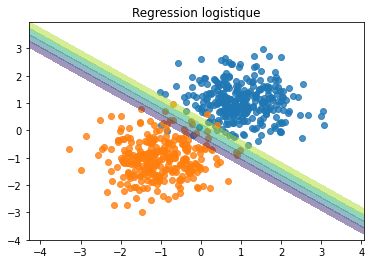

In [13]:
def logreg_cost(X, y, w):
    z = X@w
    # insérervotrecodeici
    cos = np.sum(y@z) + np.sum(np.log(1 + np.exp(-z)))
    return cos

def logreg_grad_desc(X, y):
    w = np.random.randn(X.shape[1])
    nb_iter = 100# to  tune
    pas = 0.01# to  tune
    beta = 0.9# forbacktrackingif  needed- to  tune
    for i in  range(nb_iter):
        z = X@w
        grad = X.T @ (y - (np.exp(-z) / (1 + np.exp(-z))))
        w = w - pas * grad
    return w

w = logreg_grad_desc(X, y)
logreg_cost(X, y, w)



def plot_decision_frontiers(w, XTrain, yTrain, title= "", resolution = 0.009):
    x1_min, x1_max = XTrain[:, 0].min() - 1, XTrain[:, 0].max() + 1
    x2_min, x2_max = XTrain[:, 1].min() - 1, XTrain[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
    print(w.shape)
    print(np.array([xx1.ravel(), xx2.ravel()]).T.shape)
    Z = np.array([xx1.ravel(), xx2.ravel()]).T @ w
    Z = Z.reshape(xx1.shape)
    for idx, cl in enumerate(np.unique(yTrain)):
         plt.scatter(x=XTrain[yTrain == cl, 0], y=XTrain[yTrain == cl, 1],
                alpha=0.8, label=cl)
    plt.contourf(xx1, xx2, Z, levels=[-2,-1,0,1,2], alpha=0.5,
           )
    plt.title(title)
    
plt.figure()

print("*****")
print(clf.predict_proba(X[:2, :]))
plot_decision_frontiers(w, X, y, title="Regression logistique")